# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №3. Библиотеки Pandas и Matplotlib

Задание выполнил(а): Хорошилов Артём

### Общая информация

__Дата выдачи:__ 16.11.2022

__Дедлайн:__ 04:00 27.11.2022

### Оценивание и штрафы

Каждая задача оценивается в 3 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{pandas}} \times 10/48 ,
$$

где $s_{\text{pandas}}$  — количество баллов, которое вы набрали в сумме по задачам.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

**Важно:** В этом домашнем задании предусмотрено несколько заданий, за которые можно получить бонусные баллы. Бонусные баллы прибавляются к обычным баллам, и может выйти так, что ваша итоговая оценка станет больше 10. В таком случае именно это и будет являться вашей оценкой. То есть за это ДЗ **можно** получить больше 10

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотекой pandas и matplotlib!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import copy
%matplotlib inline

Обратите внимание, что практически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, существенная часть баллов будет выставляться именно за выводы, так как в анализе данных они имеют большое значение. Таким образом, на любое задание, сформулированное в виде вопроса, отвечайте текстом, подкрепляя ваши слова написанным и выполненным кодом. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*.

При решении задач, когда вам необходимо сделать какой-то фильтр, срез, выборку, или иное действие с данными, запрещается использовать циклы (`for`, `while`) и оператор `if`.

Также в некоторых заданиях от вас будет требоваться построить графики. Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей. Пожалуйста, не пренебрегайте оформлением, поскольку в этом ДЗ это тоже оценивается.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()` и другие*

### 1

В этом домашнем задании вы поработаете с данными о пассажирах с затонувшего «Титаника», которые мы уже раннее кратко рассматривали на лекции. 

Описание данных, а также сами данные (откуда их следует скачать) находятся по следующей ссылке:

https://www.kaggle.com/c/titanic/data

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [2]:
titanic= pd.read_csv('/Users/artemhorosilov/Downloads/titanic/train.csv', delimiter=',')
print(titanic.shape)
pd.concat([titanic.head(), titanic.tail()])

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


Таблица имеет размер: 891 строка, 12 столбов.

### 2

Для каждого признака в рассматриваемых данных укажите тип этого признака

*Подсказка. Лекция 3 вам поможет!*

1) PassengerId - Вещественные (числовые), но это просто отсортированный порядковый ряд, его с трудом можно назвать числовым, но под другие типы из лекции он не подходит(лектор упоминал, что их еще куча и скорее всего он и относится под это определение).
2) Survived - Бинарный
3) Pclass - Порядковый
4) Name - Категориальные
5) Sex - Бинарный
6) Age - Вещественный (числовые)
7) SibSp - Вещественный (числовые)
8) Parch - Вещественный (числовые)
9) Ticket - Категориальная #если разбить на отдельные подгруппы, содержащие только цифры, то станет вещественным, а если с буквами, то разобьется на категориальные
10) Fare - Вещественный (числовые)
11) Cabin - Категориальный
12) Embarked - категориальный

### 3

Придумайте три какие-нибудь задачи анализа данных, которые можно было бы решать для данного датасета:

1. Задачу регрессии - то есть иными словами предсказания некоего целочисленного результата для каждого объекта
2. Задачу классификации - то есть иными словами отнесения каждого объекта к какому-то одному из двух или более заранее заданных классов (групп)
3. Задачу кластеризации - то есть иными словами разделения всех объектов на неизвестное заранее количество групп по принципу их похожести друг на друга

*Подробнее вы можете прочитать про то, что представляют собой задачи регрессии, классификации, кластеризации, например, в Википедии. Также простым языком и на конкретном примере это расписано, например, вот в этой [статье](https://habr.com/ru/company/simbirsoft/blog/565396/) (в начале)*

1) Больше ли шанс выжить человеку, если он был на борту не один?
2) Чья выживаемость лучше у женщин или мужчин?
3) Сгрупировать пассажиров по классу каюты, в зависимоти выжили они или нет.

### 4

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [3]:
#data_by_survive = titanic.groupby('Survived')
#data_by_survive.describe()
surv=titanic[titanic["Survived"] == 1]
print(surv.shape[0]/titanic.shape[0])#доля выживших
male=titanic[(titanic["Sex"] == "male") & (titanic["Survived"] == 1)]
female=titanic[(titanic["Sex"] == "female") & (titanic["Survived"] == 1)]
#print(male.shape, female.shape, titanic.shape, surv.shape) #кол-во мужчин, женщин, пассажиров
print(male.shape[0]/surv.shape[0], female.shape[0]/surv.shape[0])

0.3838383838383838
0.31871345029239767 0.6812865497076024


Выводы: Доля выживших пассажиров: 0.38; Если рассмотреть выживших со стороны пола, то выживших больше женщин, их доля составила 0.68, что логично ведь обычно сначала спасают женщин и детей, доля среди спасшихся мужчин составила 0.32

### 5

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [36]:
first=titanic[titanic["Pclass"]==1]
second=titanic[titanic["Pclass"]==2]
third=titanic[titanic["Pclass"]==3]
print(first.shape[0], second.shape[0], third.shape[0])
male=third[third["Sex"] == "male"]
female=third[third["Sex"] == "female"]
print(male.shape[0], female.shape[0])

216 184 491
347 144


Выводы: В первом классе ехало 216 человек. Во втором 184. И в самом многолюдном третьем классе ехал 491 человек.
Вв третьем классе было больше мужчин, чем женщин, 347 против 144

### 6

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки. Что можно сказать на основе результатов, которые вы получаете?

0.0 32.2042079685746 512.3292
0.0 27.07981180124218 263.0


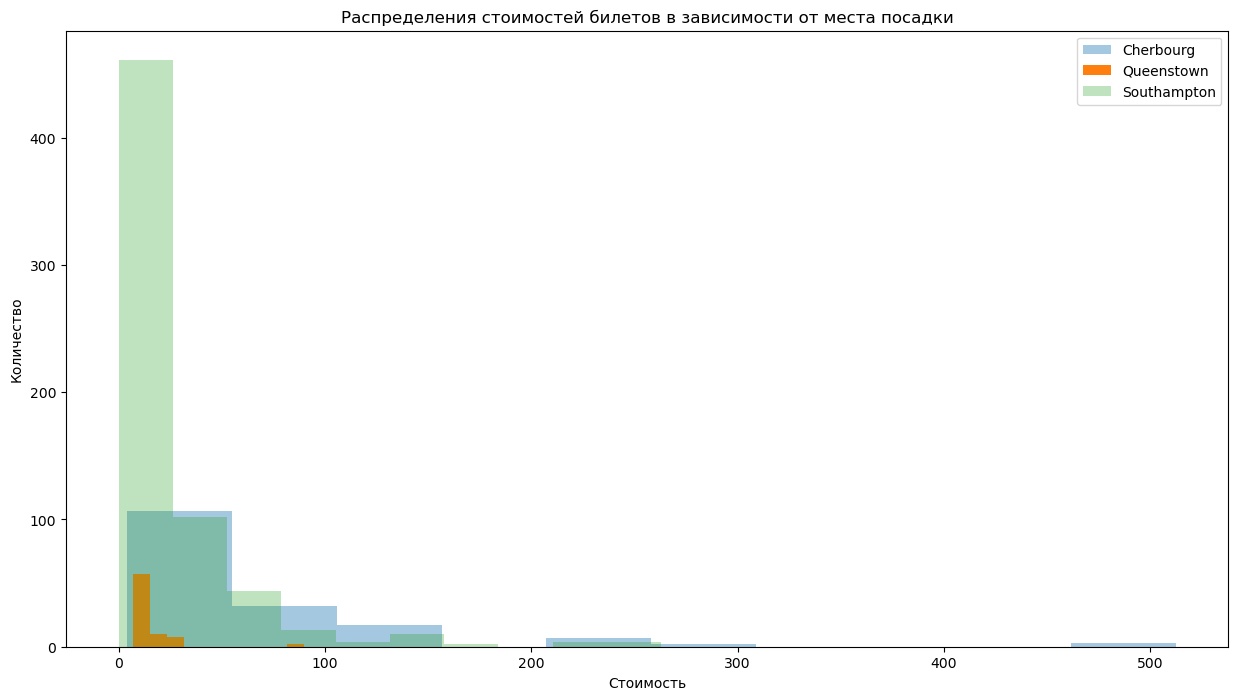

In [37]:
print(titanic["Fare"].min(), titanic["Fare"].mean(), titanic["Fare"].max())
titanic1=titanic[titanic["Embarked"]=="S"]
print(titanic1["Fare"].min(), titanic1["Fare"].mean(), titanic1["Fare"].max())

plt.figure(figsize=(15,8))
plt.title('Распределения стоимостей билетов в зависимости от места посадки')
plt.hist(titanic[titanic["Embarked"] == "C"]["Fare"], alpha=0.4)
plt.hist(titanic[titanic["Embarked"] == "Q"]["Fare"], alpha=1)
plt.hist(titanic[titanic["Embarked"] == "S"]["Fare"], alpha=0.3)
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

Выводы: 1)первое задание просто счетное, минимальную сумму пассажир заплатил: 0(так как некоторые билеты были разыграны); средняя цена была: 32,2; и максимальная сумма составила: 512,33. Что касается пассажиров, которые сели на корабль в Саутгемптоне, то минимальную сумму пассажир заплатил: 0; средняя цена была: 27,1; и максимальная сумма составила: 263.
2)Второе задание. Как можно видеть из графа, пассажир который отдал максимальную сумму и в целом пассажиры купившие самые дорогие билеты сели в Cherbourg, основная часть пассажиров с самыми дешевыми билетами села в Southampton. Интересно что меньше всего пассажиров (меньше 100) взошло на борт в порту Queenstown.

### 7

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов. Свой выбор аргументируйте

In [38]:
titanic=titanic.drop(columns=['PassengerId'])
titanic=titanic.drop(columns=['Ticket'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Выыоды: Id пассажиров не нужно, ибо pandas сам прономировывает пассажиров. Номер билетов самая непонятная переменная в данном датафрейме, у меня с определением этого столба возникли проблемы еще во втором задании, потому что его невозможно индентифицировать как единное целое из-за разной записи билетов.

### 8

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [39]:
print(titanic.isnull().any().any())
titanic.isnull().sum()

True


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Выыоды: Да, как показал первый принт в датафрейме есть пропуски. Не хватает 177 данных в колонке возраст; 687 записей о каюте пассажира и 2 значения насчет порта посадки.

### 9

Подумайте, как стоит заполнить пропуски в каждом столбце, и сделайте это. Проверьте, что пропусков нигде не осталось.

*Подсказка. Лекция 3 вам поможет!*

In [40]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].mean())
titanic["Embarked"]=titanic["Embarked"].fillna('S')
titanic["Cabin"]=titanic["Cabin"].fillna('N')
titanic.isnull().any().any()

False

Вывод: В колонке возраст у ппропущенных значений возьмем среднее, в точке старта(порте) два пропущенных значения, так как в порту "S" зашло на борт больше всего людей, то я присвою этим пропущенным значениям этот порт, а так как их всего два ничего не поменяется. Людям с неизвестной каютой, присвоил просто N

### 10

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)). Какие выводы можно сделать?

0.09156609328505765


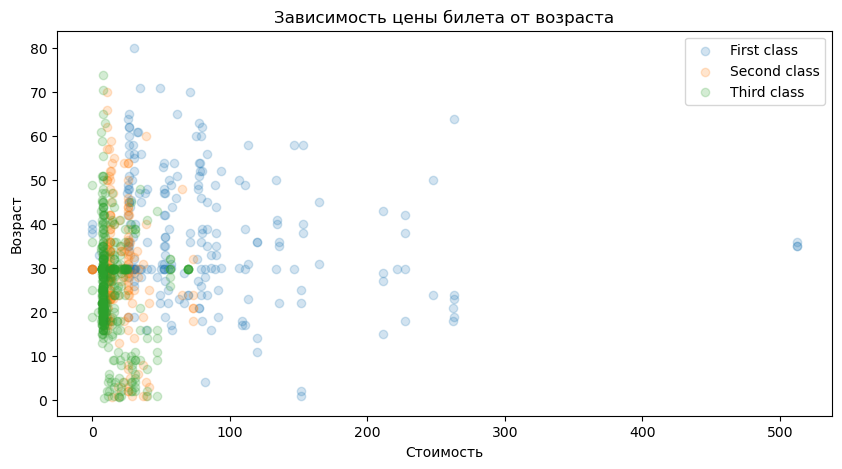

In [41]:
print(titanic["Fare"].corr(titanic["Age"]))

plt.figure(figsize=(10,5))
plt.title('Зависимость цены билета от возраста')

plt.scatter(titanic[titanic["Pclass"] == 1]['Fare'], titanic[titanic["Pclass"] == 1]['Age'], alpha=0.2)
plt.scatter(titanic[titanic["Pclass"] == 2]['Fare'], titanic[titanic["Pclass"] == 2]['Age'], alpha=0.2)
plt.scatter(titanic[titanic["Pclass"] == 3]['Fare'], titanic[titanic["Pclass"] == 3]['Age'], alpha=0.2)
plt.legend(['First class', 'Second class', 'Third class'])
plt.xlabel('Стоимость')
plt.ylabel('Возраст')
plt.show()


Выводы: корреляция равна 0.1, значит зависимости почти нет, это можно увидеть и из графа, в основном цена зависима от класса билета, я показал это на графе

### 11

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса? Свой ответ аргументируйте!

In [42]:
print(titanic[titanic["Survived"]==1]["Fare"].mean(), titanic[titanic["Survived"]==0]["Fare"].mean())
t1=titanic[(titanic["Survived"]==1) & (titanic["Pclass"]==1)]
t11=titanic[titanic["Pclass"]==1]
t2=titanic[(titanic["Survived"]==1) & (titanic["Pclass"]==2)]
t22=titanic[titanic["Pclass"]==2]
t3=titanic[(titanic["Survived"]==1) & (titanic["Pclass"]==3)]
t33=titanic[titanic["Pclass"]==3]
print(t1.shape[0]/t11.shape[0], t2.shape[0]/t22.shape[0], t3.shape[0]/t33.shape[0])

48.39540760233917 22.117886885245877
0.6296296296296297 0.47282608695652173 0.24236252545824846


Выыоды: 1)Средняя цена билета выживших пассажиров составила 48.4, а не выживших пассажиров составила 22.12, можно сделать вывод, что шанс выжить был больше, если билет дороже. 2) Зависимость выживаемости от класса также проследуется, в первом классе выжило 63% пассажиров, во втором 47% и в третьем 24%, значит как и в первом пункте, чем более высокий класс, тем выживаемость была больше.

### 12

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных, а также отличный способ улучшить качество ваших выводов из проделанного анализа в целом! Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Чем может быть полезен такой признак?

In [43]:
titanic['Relatives']=1+titanic['SibSp']+titanic['Parch']
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S,1


Выводы: По данному признаку можно посмотреть, какая вероятность была выжить, если у вас были родственники на борту. 

### 13

Теперь придумайте свой признак, который может быть полезен для анализа (несет в себе какую-то информацию), и добавьте его в таблицу. Обязательно аргументируйте, чем полезен ваш признак.

In [44]:
titanic['Paluba'] = titanic["Cabin"].str[0]
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,Paluba
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S,2,N
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S,1,N
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S,1,N


Я добавил название палубы, на титанике было всего 8 палуб, одна шлюпочная, она обозначается T; и остальные 7 обозначаются по уровню углубления от A до G. А отсутсвие в данных о палубе помечено буквой N. Мне показался этот признак довольно интересным, так как нахождение человека во время затопления судна влияет на шанс его выживания, чем ближе уровень к шлюпкам, тем больше шанс. И даже была информция, что первыми о пробоине узнали люди находившиеся ближе всего к капитанскому мостику, а это шлюпочная палуба

### 14

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. 

Креативность в этом задании приветствуется, и за нее можно получить 1-2 бонусных балла!

*Подсказка. Например, какая фамилия была самой популярной на корабле? (Лучше не используйте этот пример, а придумайте что-то своё)*

Какому проценту детей удалось спастись?(дети до 10, включая)

In [45]:
teenA=titanic[(titanic["Age"]<=10)&(titanic["Survived"]==1)]
teenN=titanic[(titanic["Age"]<=10)]
print(round((teenA.shape[0]/teenN.shape[0])*100))

59


Ответ: 59%

### 15

Постройте гистограммы распределения **вещественных** признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения анализа данных и с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация. Какие выводы можно сделать из проделанной работы? 

Глубина ответа на теоретические вопросы в этом задании приветствуется, и за нее можно получить 1-2 бонусных балла!

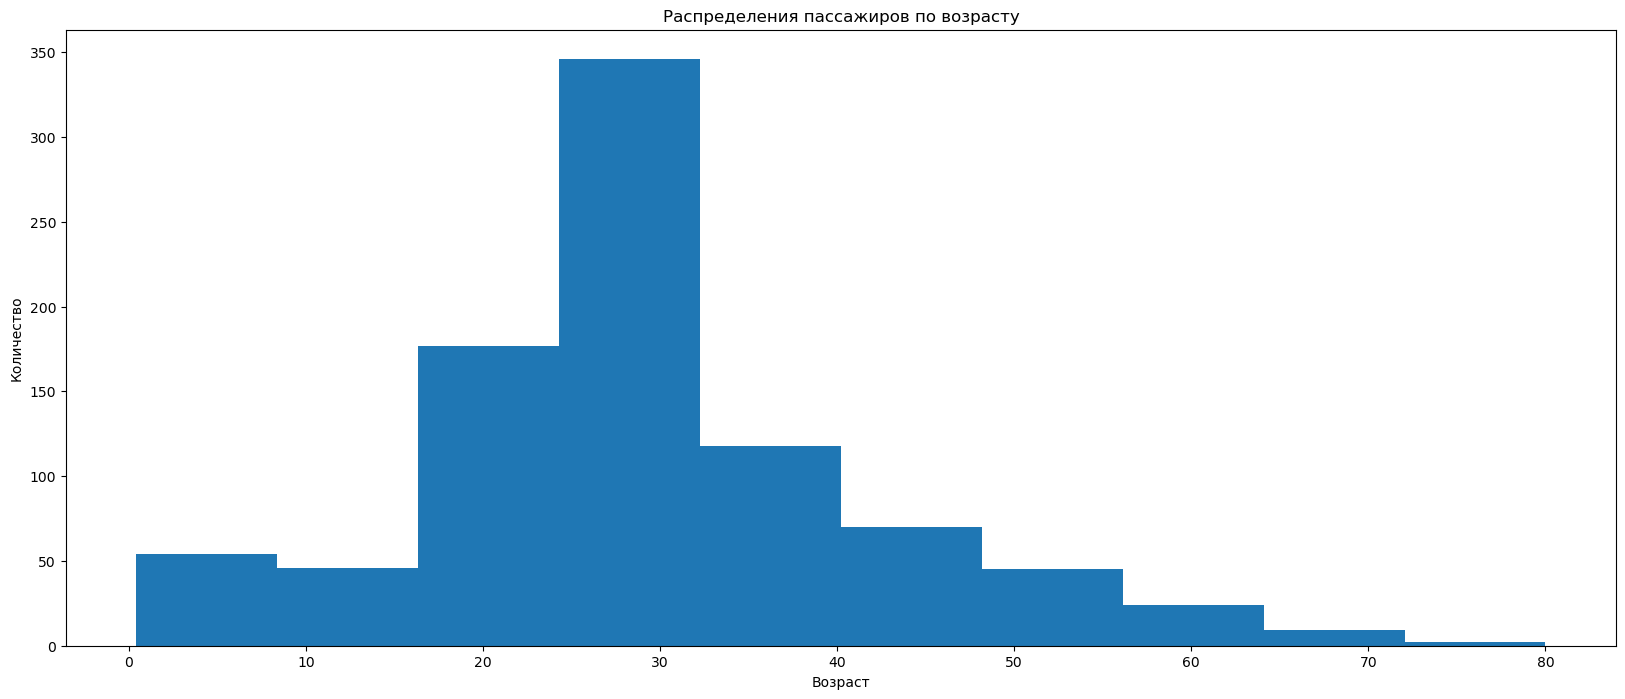

In [46]:
plt.figure(figsize=(20,8))
plt.title('Распределения пассажиров по возрасту')
plt.hist(titanic["Age"])
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

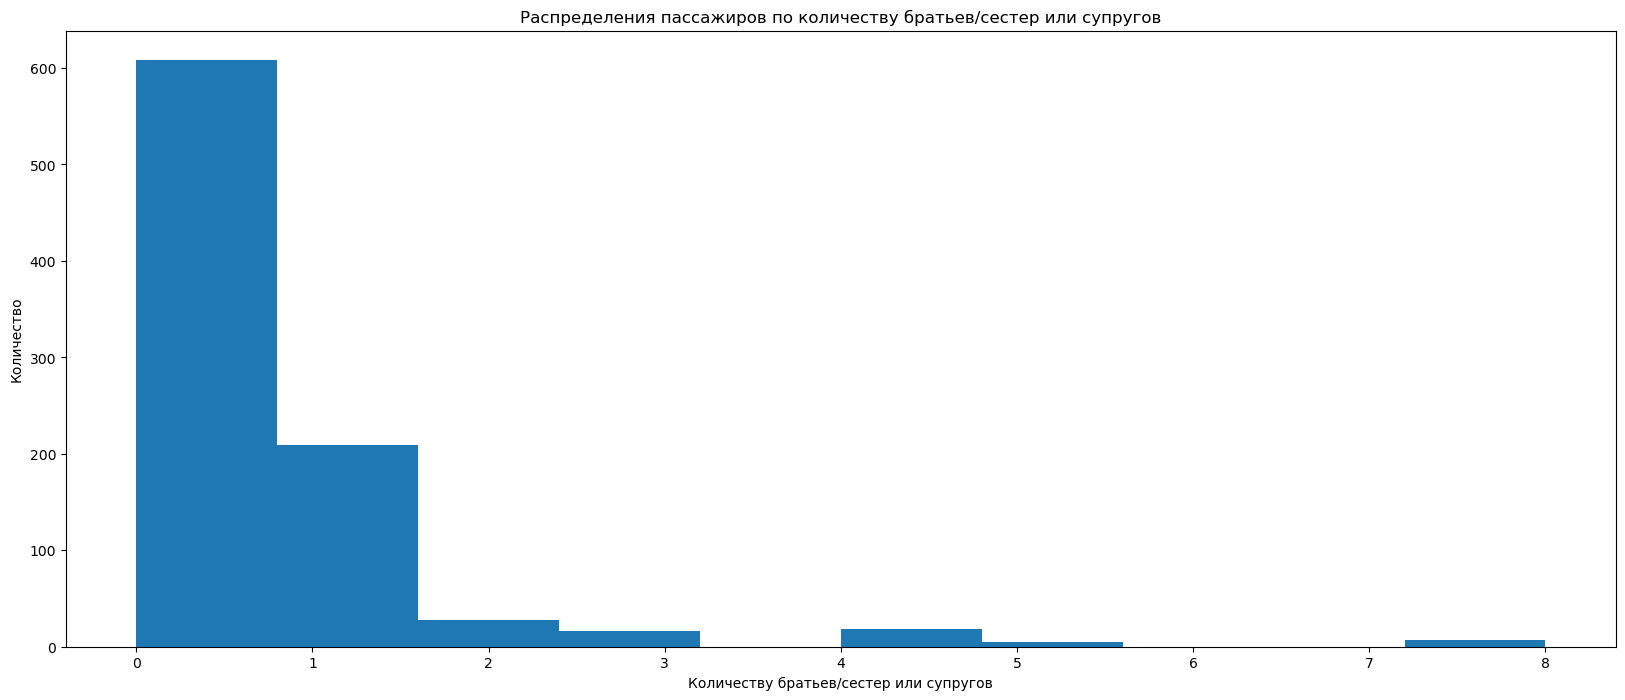

In [47]:
plt.figure(figsize=(20,8))
plt.title('Распределения пассажиров по количеству братьев/сестер или супругов')
plt.hist(titanic["SibSp"])
plt.xlabel('Количеству братьев/сестер или супругов')
plt.ylabel('Количество')
plt.show()

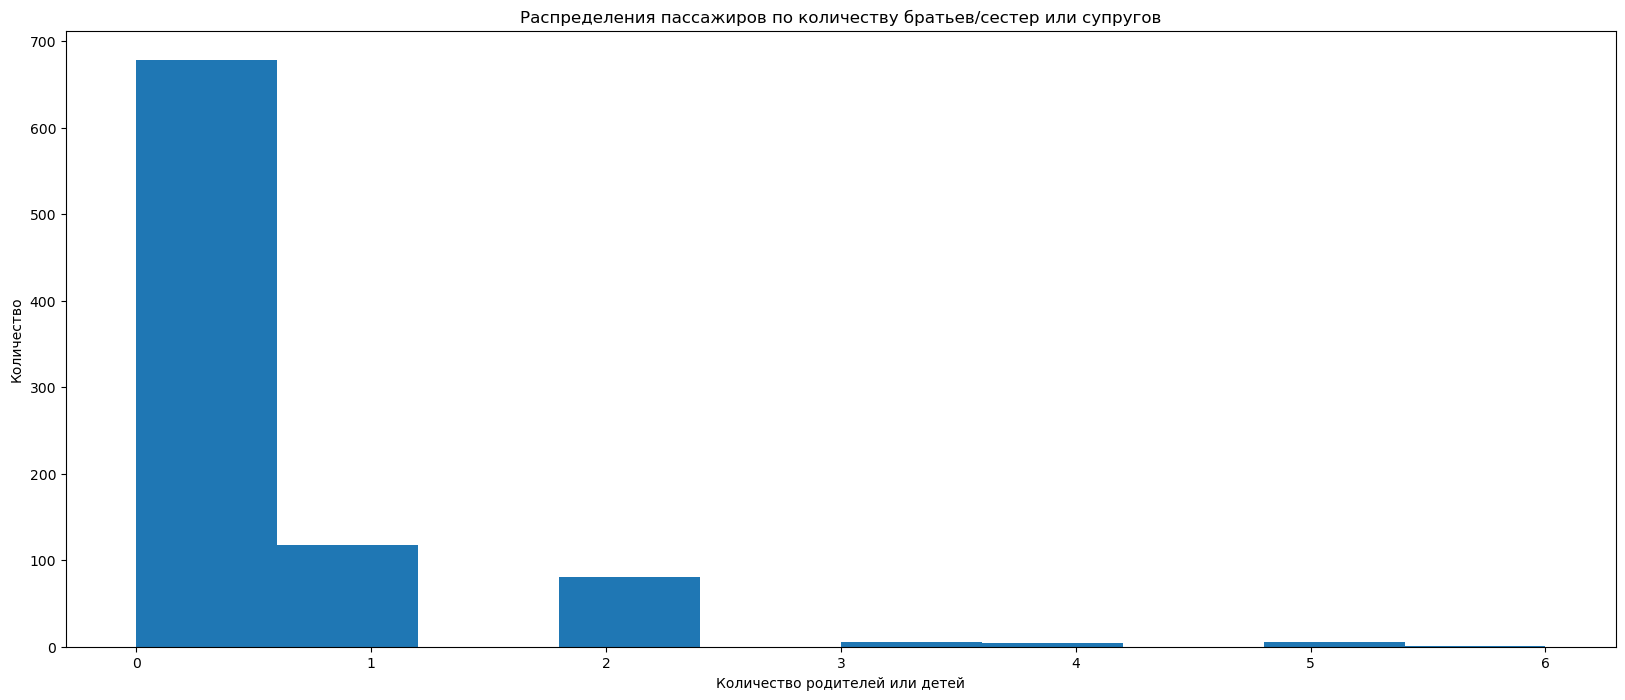

In [48]:
plt.figure(figsize=(20,8))
plt.title('Распределения пассажиров по количеству братьев/сестер или супругов')
plt.hist(titanic["Parch"])
plt.xlabel('Количество родителей или детей')
plt.ylabel('Количество')
plt.show()

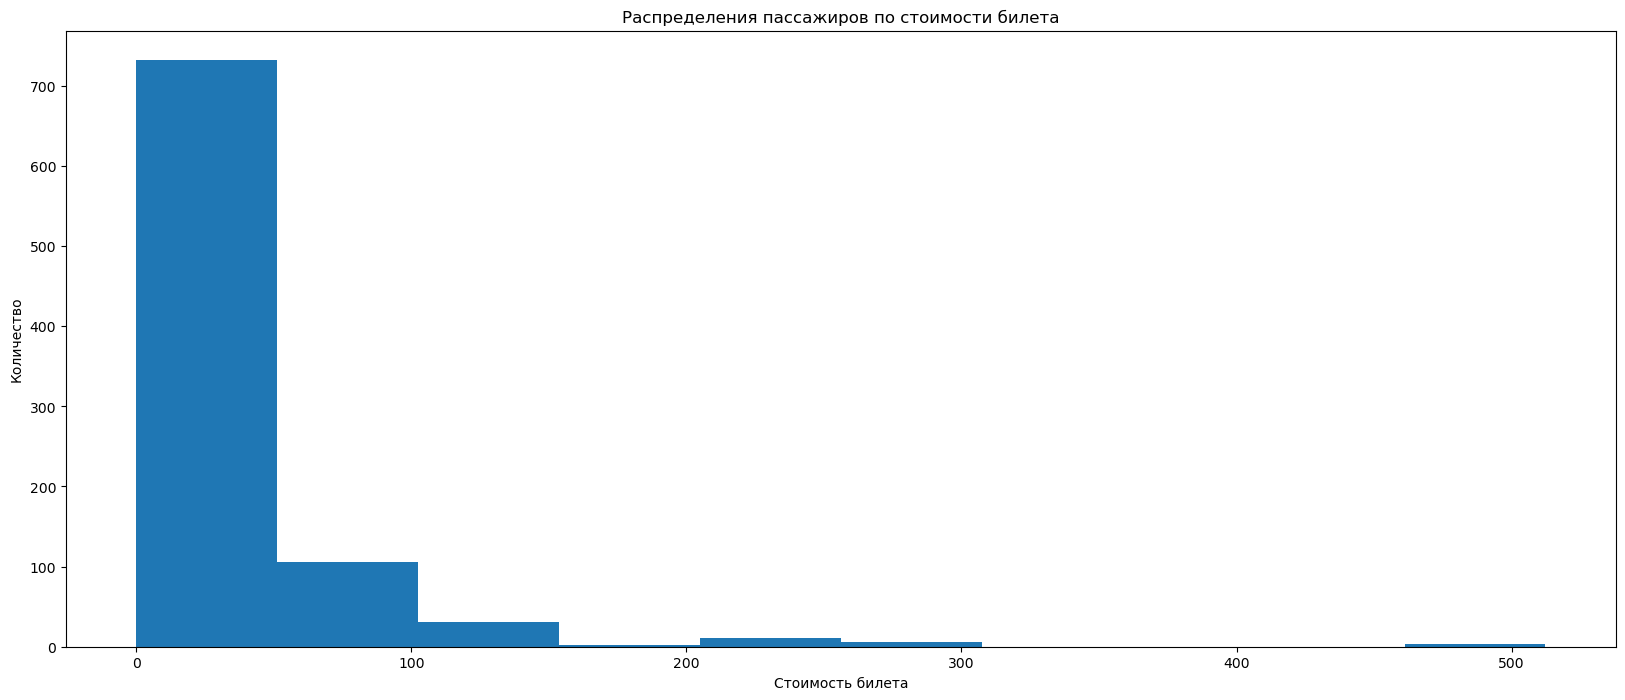

In [49]:
plt.figure(figsize=(20,8))
plt.title('Распределения пассажиров по стоимости билета')
plt.hist(titanic["Fare"])
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')
plt.show()

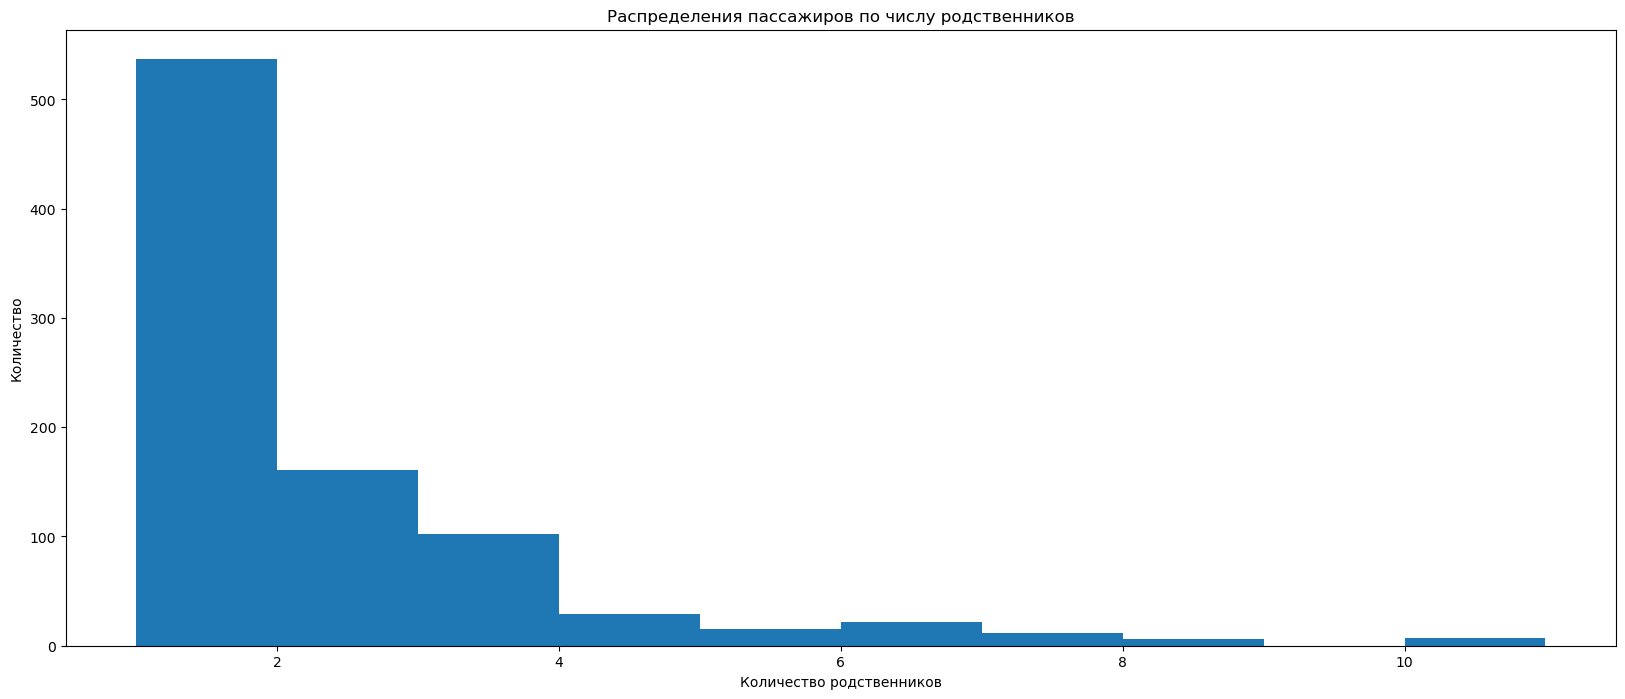

In [50]:
plt.figure(figsize=(20,8))
plt.title('Распределения пассажиров по числу родственников')
plt.hist(titanic["Relatives"])
plt.xlabel('Количество родственников')
plt.ylabel('Количество')
plt.show()

Выводы№1: Естественно, в их распределении есть разница так как все данные имеют различные еденицы измерения, что-то в годах, что-то в денежной валюте, а что-то в количестве. В случае машинного обучения группирование элементов данных без предварительного подготвки, то есть кластеризация, невозможно

In [51]:
#Отнормируем признаки


titanic["Age1"]=(titanic["Age"]-titanic["Age"].mean())/titanic["Age"].std()
titanic=titanic.drop(columns=['Age'])

titanic["SibSp1"]=(titanic["SibSp"]-titanic["SibSp"].mean())/titanic["SibSp"].std()
titanic=titanic.drop(columns=['SibSp'])

titanic["Parch1"]=(titanic["Parch"]-titanic["Parch"].mean())/titanic["Parch"].std()
titanic=titanic.drop(columns=['Parch'])

titanic["Fare1"]=(titanic["Fare"]-titanic["Fare"].mean())/titanic["Fare"].std()
titanic=titanic.drop(columns=['Fare'])

titanic["Relatives1"]=(titanic["Relatives"]-titanic["Relatives"].mean())/titanic["Relatives"].std()
titanic=titanic.drop(columns=['Relatives'])

titanic.head()

,Survived,Pclass,Name,Sex,Cabin,Embarked,Paluba,Age1,SibSp1,Parch1,Fare1,Relatives1
0,0,3,"Braund, Mr. Owen Harris",male,N,S,N,-0.592148,0.432550,-0.473408,-0.502163,0.059127
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C,C,0.638430,0.432550,-0.473408,0.786404,0.059127
2,1,3,"Heikkinen, Miss. Laina",female,N,S,N,-0.284503,-0.474279,-0.473408,-0.488580,-0.560660
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S,C,0.407697,0.432550,-0.473408,0.420494,0.059127
4,0,3,"Allen, Mr. William Henry",male,N,S,N,0.407697,-0.474279,-0.473408,-0.486064,-0.560660


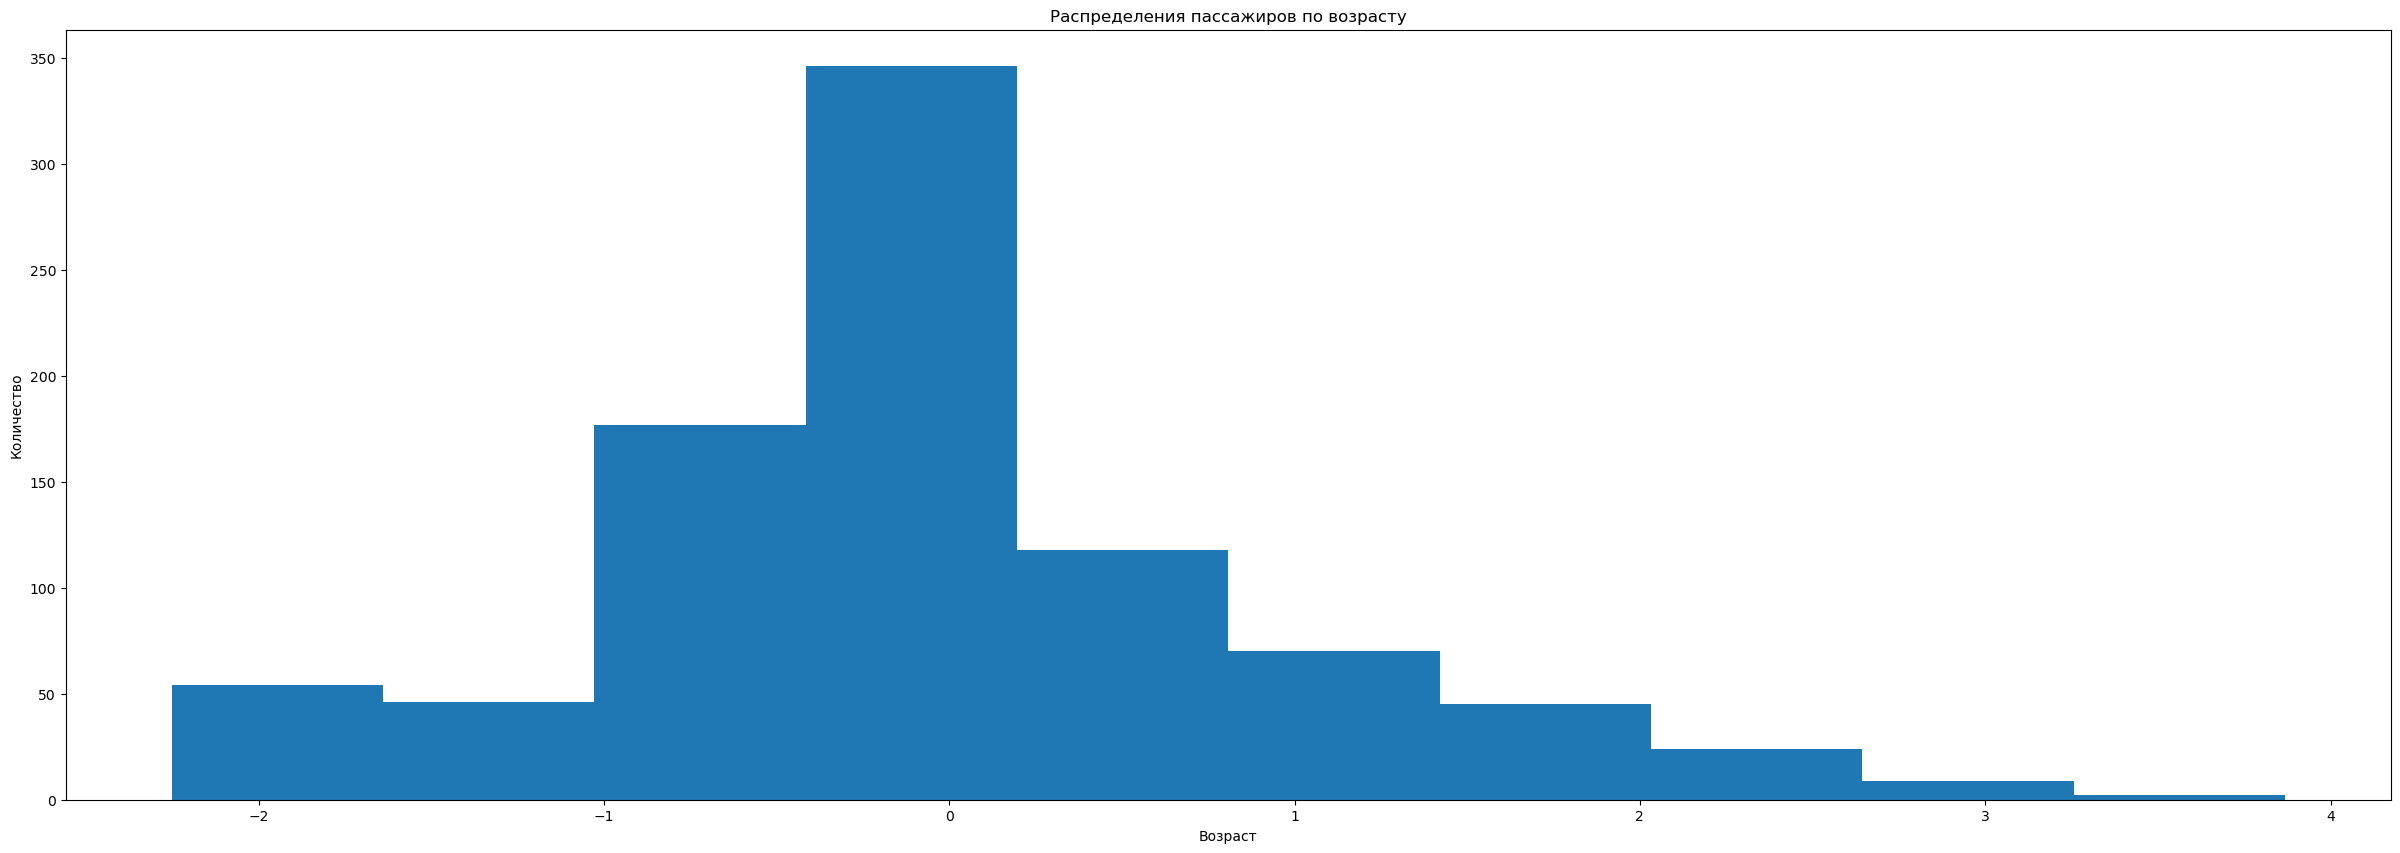

In [52]:
plt.figure(figsize=(30,10))
plt.title('Распределения пассажиров по возрасту')
plt.hist(titanic["Age1"])
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

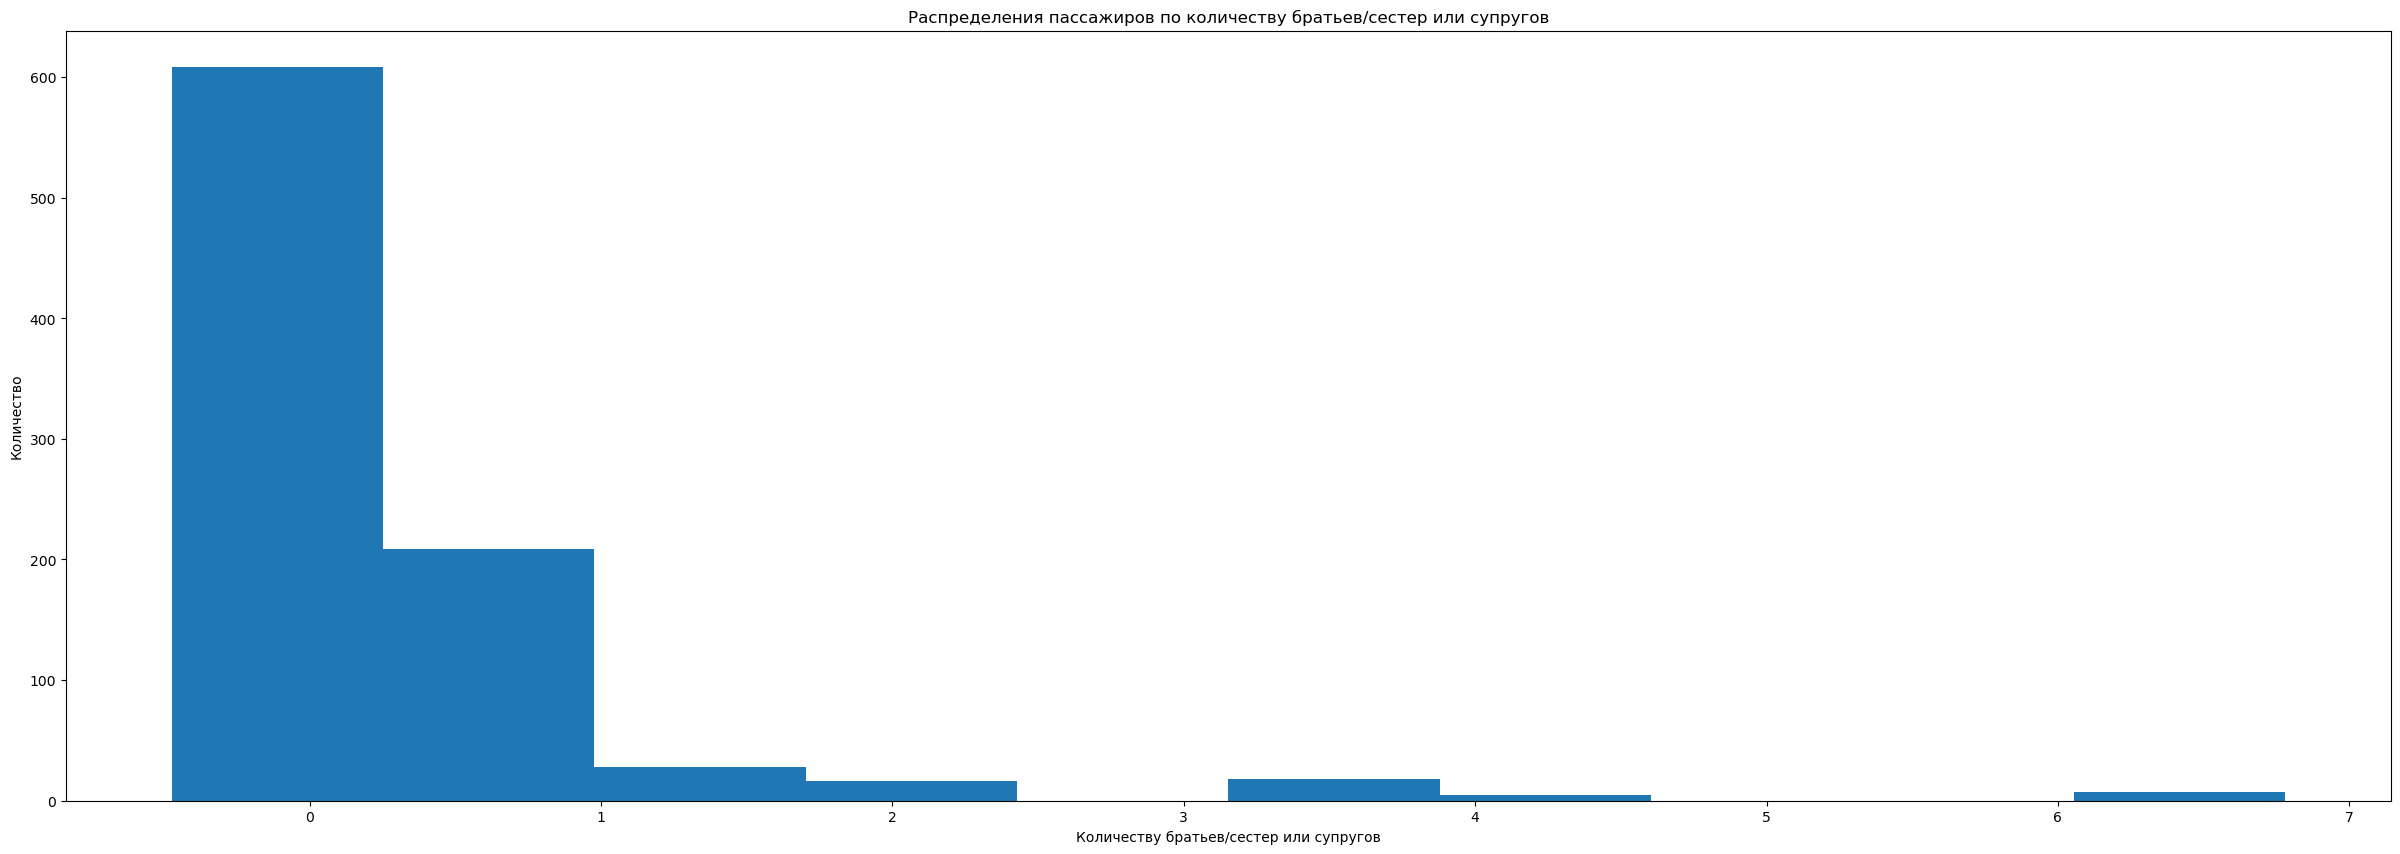

In [53]:
plt.figure(figsize=(30,10))
plt.title('Распределения пассажиров по количеству братьев/сестер или супругов')
plt.hist(titanic["SibSp1"])
plt.xlabel('Количеству братьев/сестер или супругов')
plt.ylabel('Количество')
plt.show()

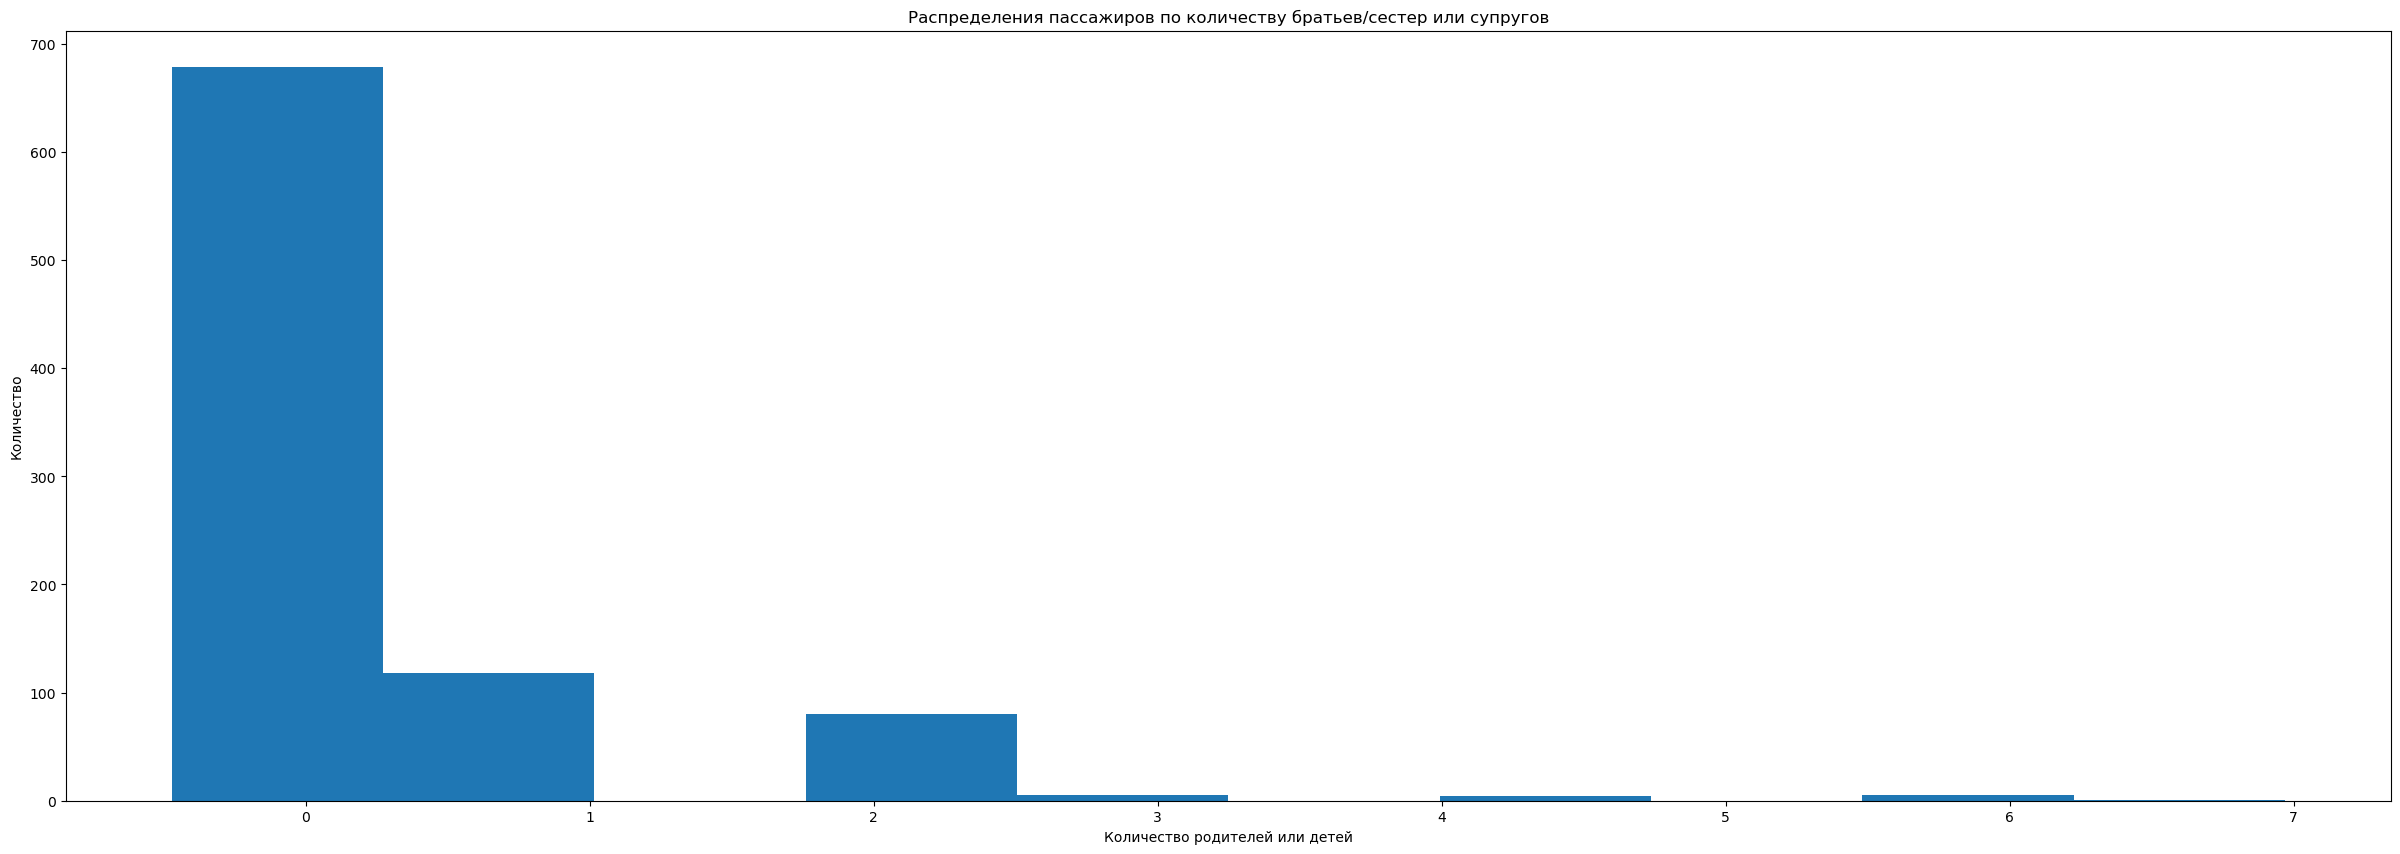

In [54]:
plt.figure(figsize=(30,10))
plt.title('Распределения пассажиров по количеству братьев/сестер или супругов')
plt.hist(titanic["Parch1"])
plt.xlabel('Количество родителей или детей')
plt.ylabel('Количество')
plt.show()

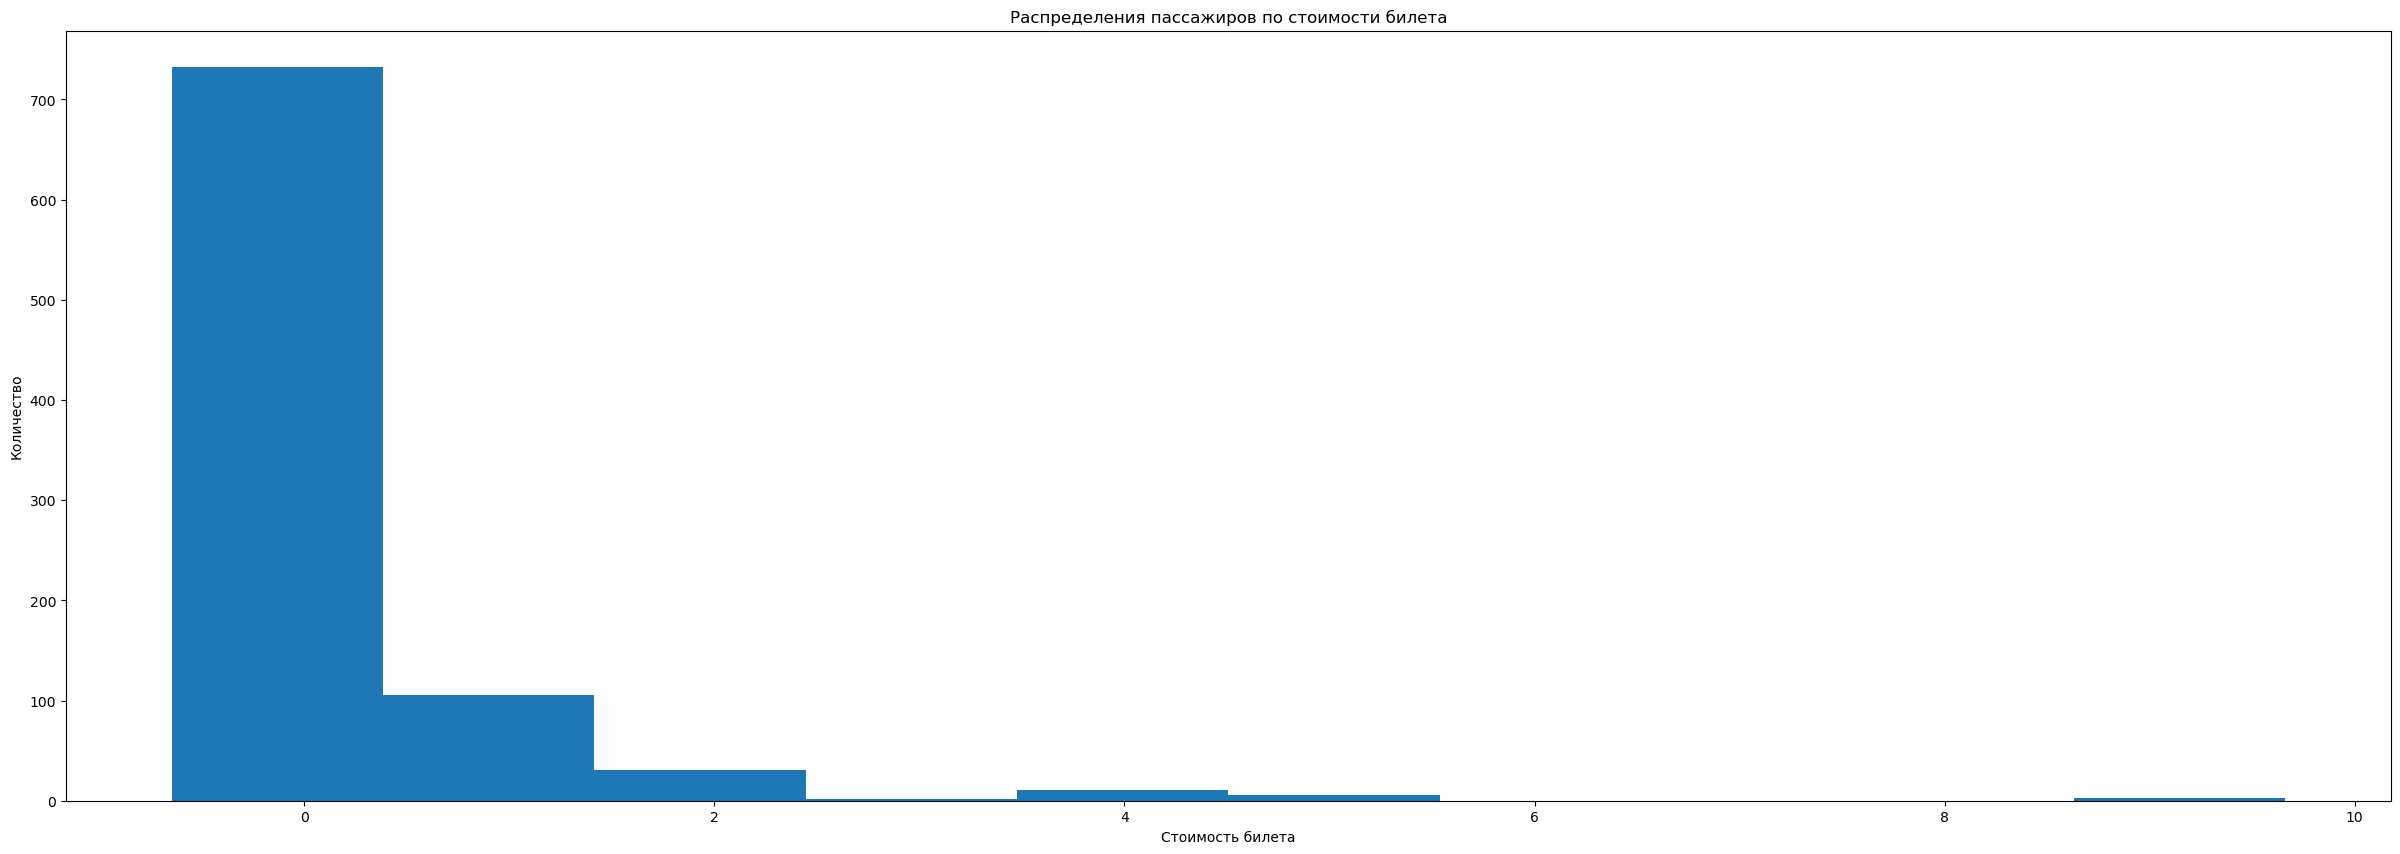

In [55]:
plt.figure(figsize=(30,10))
plt.title('Распределения пассажиров по стоимости билета')
plt.hist(titanic["Fare1"])
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')
plt.show()

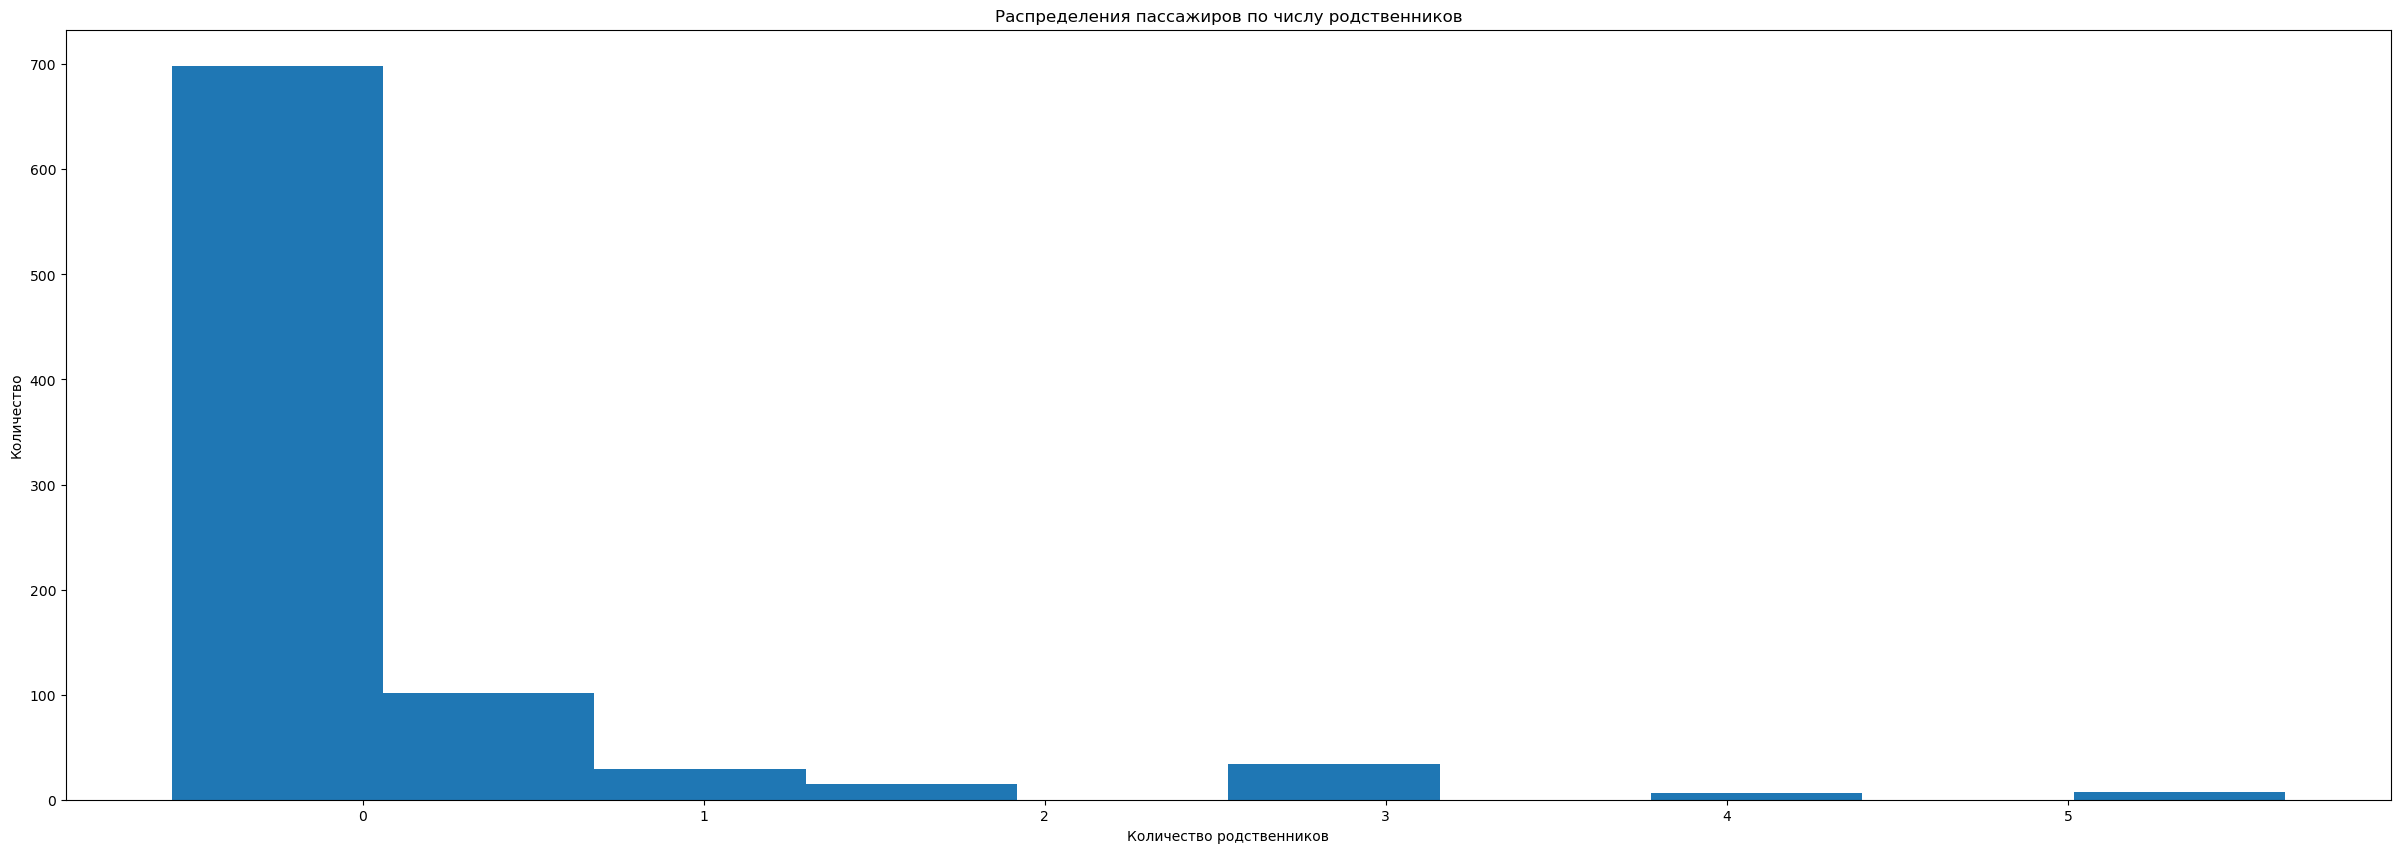

In [56]:
plt.figure(figsize=(30,10))
plt.title('Распределения пассажиров по числу родственников')
plt.hist(titanic["Relatives1"])
plt.xlabel('Количество родственников')
plt.ylabel('Количество')
plt.show()

Выводы№2: Отнурмеровав все вещественные признаки, мы привели данные к единому виду. Теперь мы можем сравнивать их и групировать. 

### 16

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы.

In [58]:
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 2

titanic.loc[titanic["Paluba"] == "T", "Paluba"] = 1
titanic.loc[titanic["Paluba"] == "A", "Paluba"] = 2
titanic.loc[titanic["Paluba"] == "B", "Paluba"] = 3
titanic.loc[titanic["Paluba"] == "C", "Paluba"] = 4
titanic.loc[titanic["Paluba"] == "D", "Paluba"] = 5
titanic.loc[titanic["Paluba"] == "E", "Paluba"] = 6
titanic.loc[titanic["Paluba"] == "F", "Paluba"] = 7
titanic.loc[titanic["Paluba"] == "G", "Paluba"] = 8
titanic.loc[titanic["Paluba"] == "N", "Paluba"] = 0

titanic.head()

,Survived,Pclass,Name,Sex,Cabin,Embarked,Paluba,Age1,SibSp1,Parch1,Fare1,Relatives1
0,0,3,"Braund, Mr. Owen Harris",0,N,2,0,-0.592148,0.432550,-0.473408,-0.502163,0.059127
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,C85,0,4,0.638430,0.432550,-0.473408,0.786404,0.059127
2,1,3,"Heikkinen, Miss. Laina",1,N,2,0,-0.284503,-0.474279,-0.473408,-0.488580,-0.560660
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,C123,2,4,0.407697,0.432550,-0.473408,0.420494,0.059127
4,0,3,"Allen, Mr. William Henry",0,N,2,0,0.407697,-0.474279,-0.473408,-0.486064,-0.560660


Выводы: Я заменил мужчин на "0", а женщин на "1" в столбце пол. И теперь порт Cherbourg обозначается как 0, Queenstown как 1, а Southampton как 2.
Менять названия билетов бесполезно, так как они отличсются форматом и с ними уже не получится работать. И не менял номер каюты, так как они все разные. Но ввел номера палуб, при отсутсвие информации обозначил 0, все остальные по уровню от 1 до 7.

## Бонусная часть на машинное обучение (до 10 бонусных баллов)

Если вам понравилась часть лекции про машинное обучение и вам хочется уже сейчас немного погрузиться в это самим, вашему вниманию предлагается простое и в то же время реальное задание на машинное обучение, за которое можно набрать большое количество бонусных баллов

### 17

Решите задачу бинарной классификации по предсказанию выживаемости пассажира (то есть целевая переменная $y$ - это столбец Survived; задача - для каждого объекта (то есть пассажира), по его признаковому пространству (то есть остальным столбцам) предсказать, выживет он или нет, на основе имеющихся данных). 

Для того чтобы это сделать, отделите от обучающей выборки целевую переменную `'Survived'` и обучите на них какой-нибудь алгоритм машинного обучения для классификации (для начинающих можно рекомендовать прочитать про, пожалуй, самый простой и понятный алгоритм для первичного освоения - kNN). С помощью выбранного и обученного вами алгоритма, постройте далее предсказание на тестовой выборке, предварительно обработав ее аналогичным образом, что и обучающую. 

In [60]:
titanic2=copy.deepcopy(titanic)
m1=[]

Так как данные уже отнормированны, удалим столбы со строчными значениями, так ка для них kNN не сможет посчитать расстаяние. Также уберу информацию о палубе, так как там 687 пропусков, а у нас база содержит 891 строку, можно было бы удалить все строки с пропусками о палубе, но это значит потерять 77% данных, что критично, а очень жаль(((

In [61]:
titanic2=titanic2.drop(columns=['Name'])
titanic2=titanic2.drop(columns=['Cabin'])
titanic2=titanic2.drop(columns=['Paluba'])

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x=titanic2.drop('Survived',axis=1)
y=titanic2['Survived']

Сделаем предсказание о выживаемости пассажира и сразу определим точноть(у меня не сложилось с kaggle, файл отказывается формироваться), в качестве random_state выберем интервал от 1 до 100 так точность постоянно будет менятся если не зафиксировать seed. В качестве соседа выберу значение 1

In [63]:
for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = i)
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    #посчитаем точности по разным сидам, и занесем их всех в массив
    k="{:.2f}".format(knn.score(x_test, y_test))
    k=float(k)
    m1.append(k)

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

Узнаем максимальную точность, но мне кажется логичнее брать среднее арифметическое.

In [64]:
from statistics import mean
print("Maximum accuracy: ", round(max(m1), 2), "  Mean accuracy: ", round(mean(m1), 2))

Maximum accuracy:  0.79   Mean accuracy:  0.75


На основе данных, с которыми вы работали, было сделано соревнование на Kaggle, ориентированное на начинающих Data Scientists: https://www.kaggle.com/c/titanic. Вам предлагается в нем поучаствовать — если вы дошли до этого момента, то для этого осталось совсем ничего. Зарегистрируйтесь на Kaggle и примите правила соревнования. Если у вас уже есть ответ для тестовой выборки, который вы хотите отправить для оценивания и попасть в лидерборд, его нужно добавить в .csv файл и оформить нужным образом. Для этого во вкладке с данными (https://www.kaggle.com/c/titanic/data) есть пример того, как должен выглядеть этот файл ("gender_submission.csv"). Вы можете скачать и изучить его. Для вашего удобства ниже приведен код, который позволяет сформировать файл для отправки.

In [257]:
subm = pd.read_csv('gender_submission.csv')
subm['Survived'] = prediction_test

In [ ]:
subm.to_csv('test_subm_proba.csv', index=False)

Отправьте файл на оценивание с помощью кнопки "Submit Predictions". Метрика, используемая в соревновании — accuracy. Какой получился результат? Попробуйте его улучшить! Например, попробуйте выбрать признаки, которые были бы наиболее полезны для предсказания (feature selection) или создайте новые признаки (feature generation). 

* Вывод : Максимальная точность получилась 0.79 с random_state = 57, а средняя точность 0.75

Попытаюсь улучшить точность, удалив стлобы из данных с братьями, сестрами и родителями, детьми, так как в данных уже присутствует столб с родственниками, содержащий все эти элементы. Так же в прошлых заданиях было подсчитано, что чем дороже билет, тем больше шанс выжить, а также я приводил граф в котором было показнно, что стоимость билета зависела от выбранного класса каюты. Поэтому я отфильтровал данные, так чтобы остались только пассажиры 1 и 2 класса.

Делаю все тоже самое как и на прошлом шаге, только еще удаляю Parch, SibSp и фильтрую данные. 

In [69]:
titanic2=copy.deepcopy(titanic)
m2=[]

In [70]:
titanic2=titanic2.drop(columns=['Name'])
titanic2=titanic2.drop(columns=['Parch1'])
titanic2=titanic2.drop(columns=['SibSp1'])
titanic2=titanic2.drop(columns=['Cabin'])
titanic2=titanic2.drop(columns=['Paluba'])
titanic2=titanic2[(titanic2["Pclass"]==1) | (titanic2["Pclass"]==2)]

In [71]:
x=titanic2.drop('Survived',axis=1)
y=titanic2['Survived']

In [72]:
for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = i)
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    k="{:.2f}".format(knn.score(x_test, y_test))
    k=float(k)
    m2.append(k)

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [73]:
print("Maximum accuracy: ", round(max(m2), 2), "  Mean accuracy: ", round(mean(m2), 2))

Maximum accuracy:  0.85   Mean accuracy:  0.77


Точность после дополнительных преобразований: максимальная 0.85 с random_state = 57, а средняя точность 0.77

### Важно!

Вы можете найти очень много полезной информации по этому доп.заданию в https://www.kaggle.com/c/titanic/kernels и https://www.kaggle.com/c/titanic/discussion!

Но воздержитесь от плагиата кода оттуда